# Segment Shopping Customers

## Overview
A target market strategy is a business plan focused on growing sales and brand awareness within a specific group of consumers. To do this, businesses strategize based on demographics that make up a market, which is an area or group specified for product sales.

##  Defining the Question
### Problem statement 
Understand the Target Customers for the marketing team to plan a marketing strategy

###  Defining the Metric for Success
Being to clearly cluster the customers based on income, age and shopping mall shopping score

### Recording the Experimental Design
1. Data Preparation
 - Loading Dependencies
 - Loading the Dataset
 - Dealing with Irrelevant Observations
 - Handling missing/duplicate values
 - Data Uniformity
 - Checking Outliers
3. Exploratory Data Analysis
 - Univariate analysis
 - Bivariate analysis
4. Clustering
 - KMean Clustering
5. Performance Analysis
6. Conclusions and Recommendations

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the Dataset
df = pd.read_csv("C:/Users/Njuguna/Desktop/Portfolio Project/Mall_Customers.csv")

In [3]:
#Previewing the top rows of the dataset 
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Renaming the columns
df.columns = ('CustomerID','Gender','Age','Annual Income','Spending Score')

In [5]:
#Checking for missing values 
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [6]:
#Checking for duplicates 
df.duplicated().sum()

0

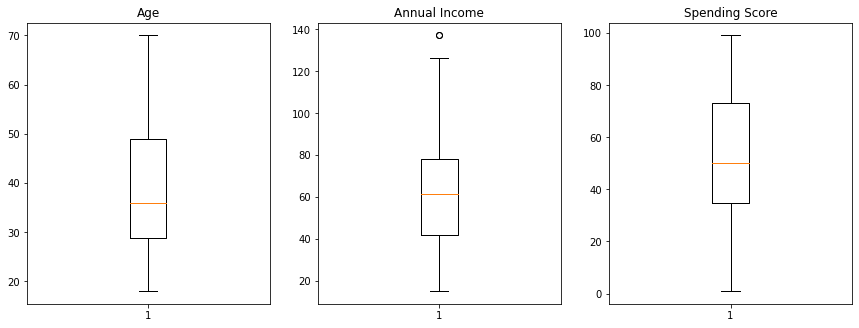

In [7]:
#Checking for outliers using boxplot
numerical={'Age':1,'Annual Income':2,'Spending Score':3}

plt.figure(figsize=(20,30))

#Visualizing the Information on a boxplot:
for variable,i in numerical.items():
  plt.subplot(5,4,i)
  plt.boxplot(df[variable])
  plt.title(variable)
plt.show()

Income has an outlier. After further investations it was established that one customer had a higher income so it was not outlier.

## Exploratory Data Analysis

### Univariate Analysis

In [8]:
# Checking for statistical Analysis 
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


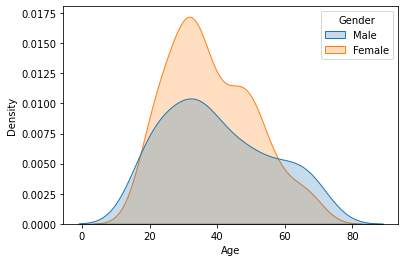

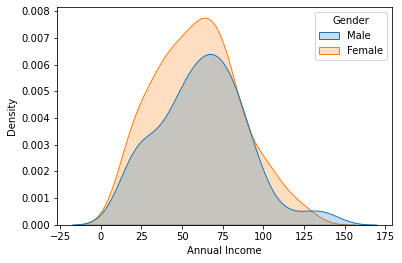

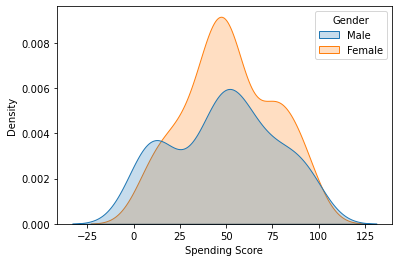

In [9]:
# Visualizating dataset distribution

columns = ['Age','Annual Income','Spending Score']

for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade = True,hue = df['Gender']);

* The dataset is normally distribured 
* We have more female customers than males

### Bivariate Analysis

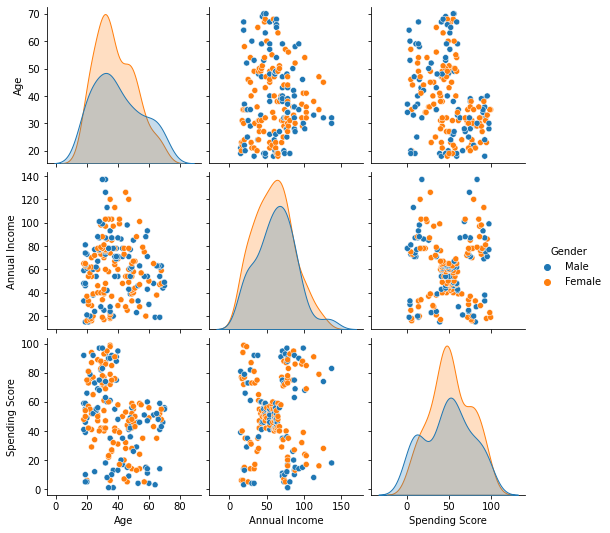

In [10]:
#Plotting a pairplot 
df = df.drop('CustomerID',1)
sns.pairplot(df,hue = 'Gender')
plt.show()

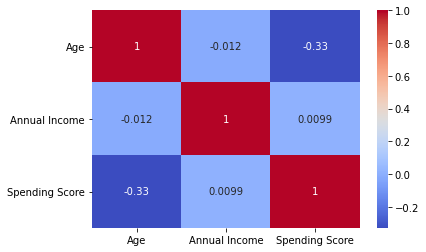

In [11]:
# Plotting a Heatmap to preview correlation
sns.heatmap(df.corr(),annot = True, cmap= 'coolwarm')
plt.show()

* Age has weak negative correlation to spending income


## Implementing the Solution 

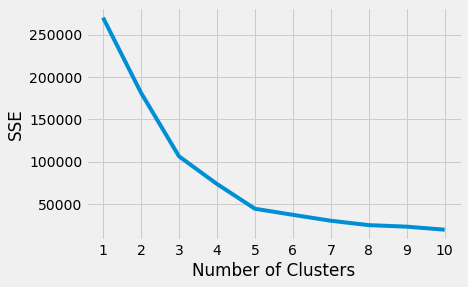

In [12]:
# Using Elbow joint method to get  optimum number of clusters 
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df[['Annual Income','Spending Score']])
  sse.append(kmeans.inertia_)

#visualization of the elbow joint diagram
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [13]:
#Using kneed package to confirm if 5 is the correct number of clusters 
from kneed import KneeLocator

k1 = KneeLocator(
range(1, 11), sse, curve="convex", direction="decreasing")
k1.elbow

5

In [18]:
# Instacting the model 
model = KMeans(n_clusters = 5)

In [19]:
#Fitting the Dataset 
model.fit(df[['Annual Income','Spending Score']])

KMeans(n_clusters=5)

In [20]:
#Adding the clusters in the dataset 
df['Spending and Income cluster'] = model.labels_
df.head()

,Gender,Age,Annual Income,Spending Score,Spending and Income cluster
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3


In [24]:
# Getting the centroids 
centers = pd.DataFrame(model.cluster_centers_)
centers.columns = ['x','y']

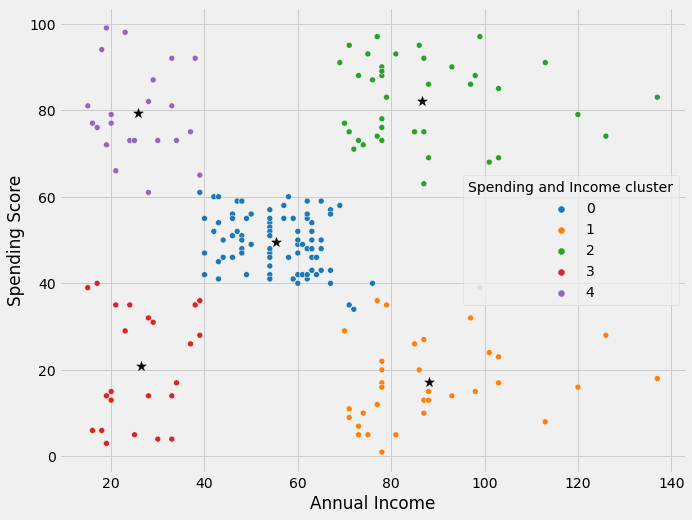

<Figure size 432x288 with 0 Axes>

In [33]:
#Visualizing the clusters and centroids 
plt.figure(figsize = [10,8])
plt.scatter(x=centers['x'],y = centers['y'],s=100,c='black',marker = '*')
sns.scatterplot(data = df, x ='Annual Income',y = 'Spending Score',hue ='Spending and Income cluster',palette='tab10')
plt.show()
plt.savefig('Clusters.png')

* There are clear clusters among the customers based on Annual income and speding score

In [36]:
# Getting percentage of customers by gender per cluster 
pd.crosstab(df['Spending and Income cluster'],df['Gender'],normalize= 'index')

Gender,Female,Male
Spending and Income cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.538462,0.461538
3,0.608696,0.391304
4,0.590909,0.409091


In [30]:
#Get average age of the clusters 
df.groupby('Spending and Income cluster')['Age','Annual Income','Spending Score'].mean()

,Age,Annual Income,Spending Score
Spending and Income cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


## Recommendation

* Cluster 4 has the lowest age average and Annual income 
 but has the highest speding score. This will be a good group to target for flash sales.
* Cluster 2 can be the ideal group to do a campign on because they have a high annual income and spending score.
* 54% of cluster 2 are females shoppers. We should ook for ways to attact there customers during the campaign.

In [34]:
# Saving the model to use for future customer prediction
df.to_csv('Clusters.csv')